# Search Space Calculations

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Constants/Globals
charsets = {'digits': 10, 'alpha': 26, 'alphanum': 36, 'aLpHaNuM': 62, 'special': 95}
plt.rcParams['figure.figsize'] = [10, 8]

## Basic Combinatorics
While I was working through some of these tests, I began do want to do some calculations to predict cracking completion time and to understand the implications of increasing (or decreasing) knowledge of the requirements for a given password. The most general form of the calculation is $x^y$ where $x$ is the number of candidate characters in the selected alphabet, and $y$ is the length of the password. As an example, an 8-character password that uses characters in `a..z0..9` would have a search space of $36^8$ or $2.82 \times 10^{12}$ potential passwords. Confirming this, if you run the `maskprocessor` utility from the `hashcat` suite, you will confirm this:

```bash
$ ./mp64.bin -1 ?l?d ?1?1?1?1?1?1?1?1 --combinations
2821109907456
```

*However*, if you visit the respected [GRC Password Haystacks page](https://www.grc.com/haystack.htm) and enter a similarly-styled password (e.g. `a9a9a9a9`), you will get an answer of $2.90 \times 10^{12}$. At first, this might not seem like it is that different, but if you compare the raw numbers, there is a difference of over 80 *billion* ($8.06 \times 10^{10}$) candidates. This appears to be *quite a significant difference of opinion*. After digging in a little, howevever, the rationale becomes quite clear, and the calcuations are (in principle) the same - it is just that the GRC calculator assumes not only the search space for an 8-character password, but also a 7-character password, and 6-characters, etc. As such, the GRC solution uses a formula such as $x^y + x^{y-1} + x^{y-2} + ... + x^{1}$. Depending on how you view things, the GRC equation is *more complete* and makes no assumptions as to the actual length of the password. If, however, you *know* that the password is exactly $y$ characters long (e.g. `8` in this scenario), the equation simplifies to that used by the `maskprocessor` in `hashcat` ($x^y$).

As you have increasing knowledge about specific details of the password (e.g. rules/limitations to character sets), the less accurate the generalized GRC calculation will be and the more important it will be to calculate the search space explicitly. Let's take our 8-character password from above... if we additionally know not only its length and that it uses `a..z0..9`, but maybe we additionally know that it must have 3 characters from `0..9` and, therefore 5 characters from `a..z`. This leads to two different values for $x$ in our formula above, `10` and `26`. Therefore, we could calculate the entire search space as $10^3 \times 26^5 = 11,881,376,000 = 1.19 \times 10^{10}$.

*__But wait a minute__* you say, this makes an assumption that we also know *which* positions in the password must be numbers. If we don't, it could be equally possible to be any position, leading us back to the $x^y$ space.

## Character Sets and Length

Let's consider for a moment, the impact of both the size of your character set as well as the length of the password. To start out, the following figure shows a password of length 1-4 for various character sets:

In [3]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
for i in range(21):
    c0.append(charsets['digits']**i)
    c1.append(charsets['alpha']**i)
    c2.append(charsets['alphanum']**i)
    c3.append(charsets['aLpHaNuM']**i)
    c4.append(charsets['special']**i)

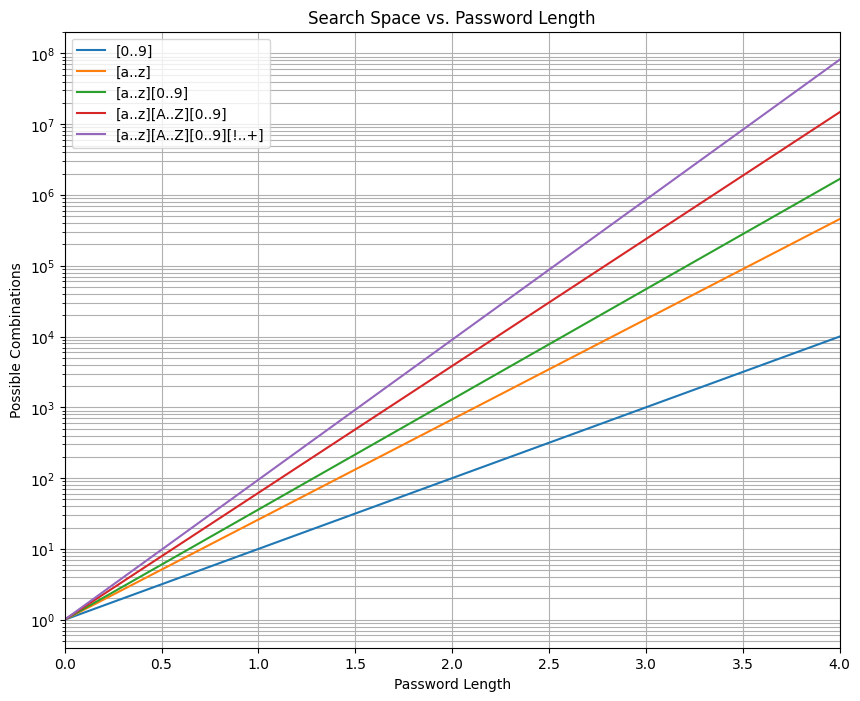

In [4]:
plt.plot(c0[:5], label='[0..9]')
plt.plot(c1[:5], label='[a..z]')
plt.plot(c2[:5], label='[a..z][0..9]')
plt.plot(c3[:5], label='[a..z][A..Z][0..9]')
plt.plot(c4[:5], label='[a..z][A..Z][0..9][!..+]')
#plt.ylim(np.exp(0),np.exp(20.0))
plt.xlim(0,4)
plt.yscale('log')
plt.grid(True, which="both")
#plt.minorticks_on()
plt.title('Search Space vs. Password Length')

plt.gca().yaxis.set_major_locator(plt.LogLocator(base=10, numticks=10))
plt.gca().yaxis.set_minor_locator(plt.LogLocator(base=10, subs='all', numticks=10))
plt.ylabel('Possible Combinations')
plt.xlabel('Password Length')
plt.legend()
plt.savefig("../../assets/images/pwsearchspace01.png", bbox_inches='tight')
plt.show()

A couple of key items to point out in this figure include:

1. The y-axis scale is *logrithmic*. This means that each major tickmark is an order of magnitude (10x larger) than the prior major line. So, while the data in this figure appears linear, it is actually increasing logrithmically. If this were plotted on a non-logrithmic scale, the values for `length == 4` would be so much larger `length == 3`, everything would appear as a nearly straight line prior. An example of this is shown just below.
1. Stating the obvious, but each character added to the password drastically increases the search space, even if the available character set is limited. Adding 1 additional character to a password consisting just of the numbers `0..9` increases the search space by an order of magnitude. The increase is more stark the further complicated the character set becomes.
1. Given a password length of 4, the digit-only option has `100,000` possible passwords. On the other end of the spectrum, the mixed case, digits and special characters option has `7,737,809,375` possible combinations - over 7.7 billion _more_ than the digit-based version.

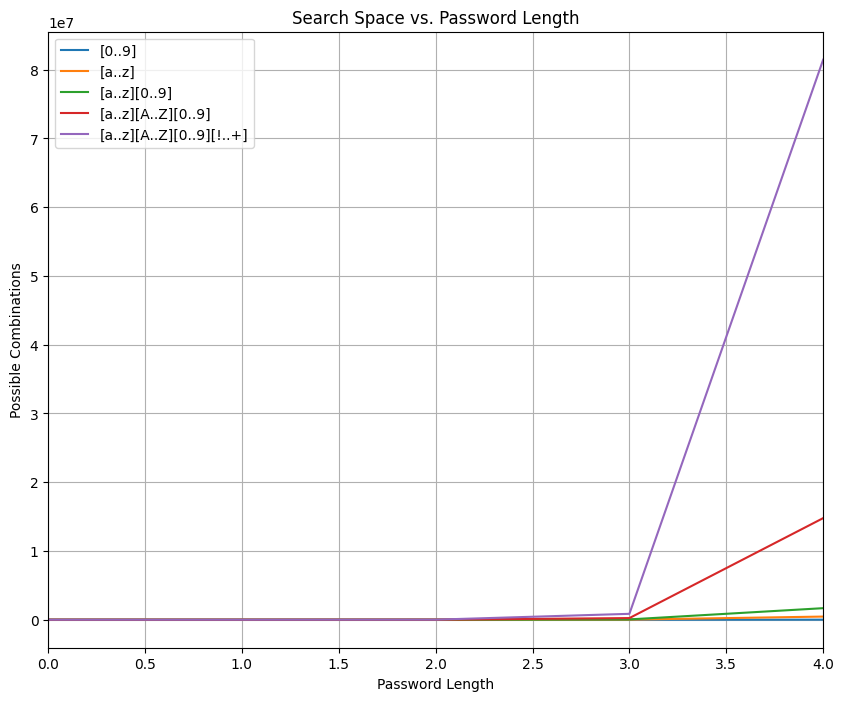

In [8]:
plt.plot(c0[:5], label='[0..9]')
plt.plot(c1[:5], label='[a..z]')
plt.plot(c2[:5], label='[a..z][0..9]')
plt.plot(c3[:5], label='[a..z][A..Z][0..9]')
plt.plot(c4[:5], label='[a..z][A..Z][0..9][!..+]')
plt.xlim(0,4)
plt.grid(True, which="both")
plt.title('Search Space vs. Password Length')

plt.ylabel('Possible Combinations')
plt.xlabel('Password Length')
plt.legend()
plt.savefig("../../assets/images/pwsearchspace00.png", bbox_inches='tight')

If we take the chart out to a password length of 8, we consider the following figure:

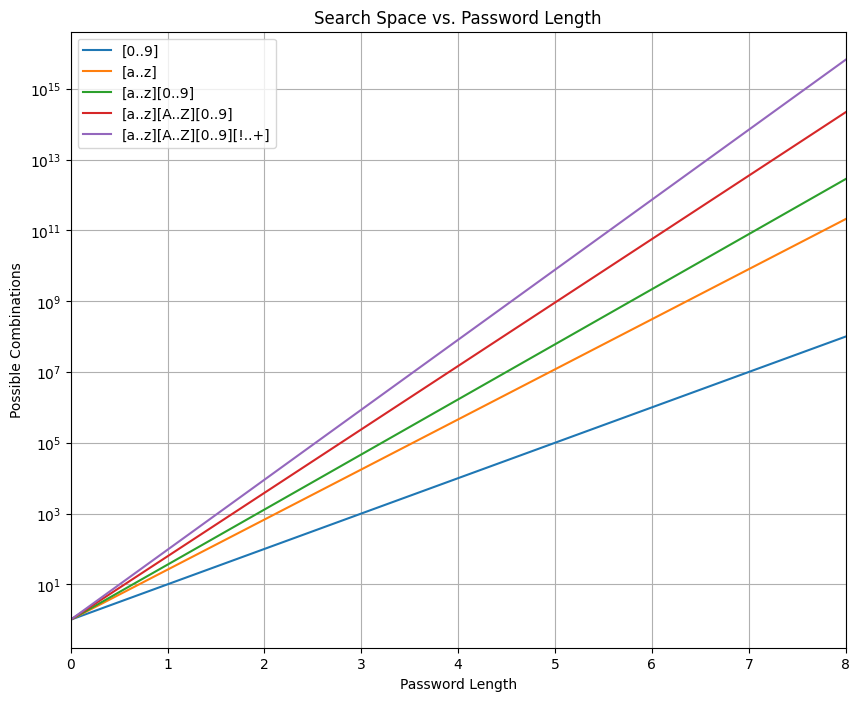

In [5]:
plt.plot(c0[:9], label='[0..9]')
plt.plot(c1[:9], label='[a..z]')
plt.plot(c2[:9], label='[a..z][0..9]')
plt.plot(c3[:9], label='[a..z][A..Z][0..9]')
plt.plot(c4[:9], label='[a..z][A..Z][0..9][!..+]')
#plt.ylim(np.exp(0),np.exp(20.0))
plt.xlim(0,8)
plt.yscale('log')
plt.grid(True, which="both")
#plt.minorticks_on()
plt.title('Search Space vs. Password Length')

plt.gca().yaxis.set_major_locator(plt.LogLocator(base=10, numticks=10))
plt.gca().yaxis.set_minor_locator(plt.LogLocator(base=10, subs='all', numticks=10))
plt.ylabel('Possible Combinations')
plt.xlabel('Password Length')
plt.legend()
plt.savefig("../../assets/images/pwsearchspace02.png", bbox_inches='tight')
plt.show()

We here see that the pattern for each of the character sets continues as expected. The gaps between a simple set (e.g. `0..9`) and a complex set including mixed case, numbers and special characters grows. For our most complex set, we have now jumped to a search space of over $63 \times 10^{16}$ or 630 _quadrillion_ candidates.

Our final version of the chart simply drives home what we now know: long passwords with complex character sets have very large search spaces, and each additional character in the password greatly increases that space.

<figure markdown>
  [![Search Space for length 20][3]][2]
</figure>



  [1]: ../../assets/images/pwsearchspace01.png
  [2]: ../../assets/images/pwsearchspace02.png
  [3]: ../../assets/images/pwsearchspace03.png


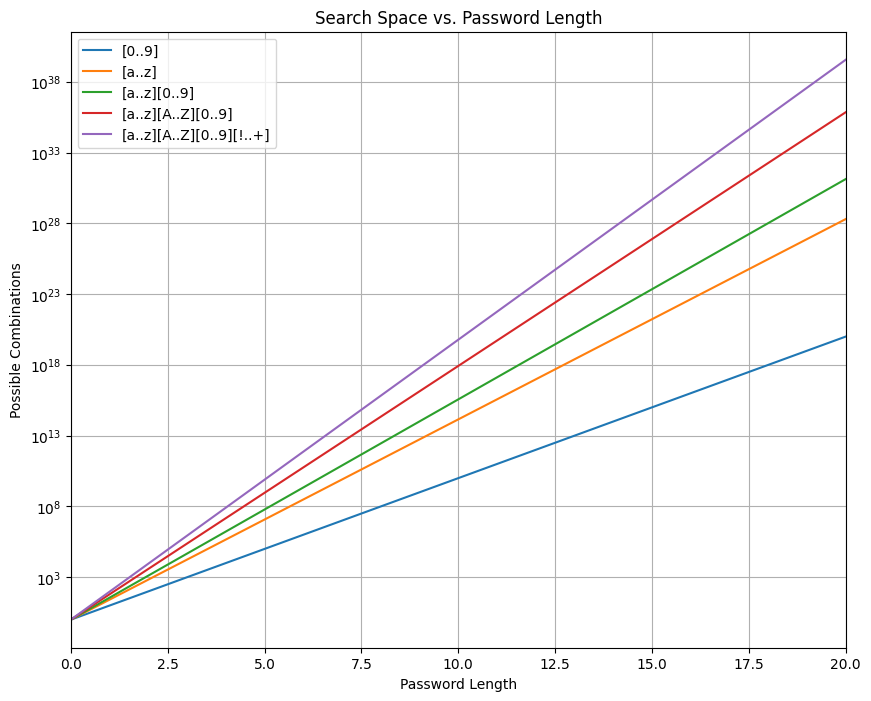

In [6]:
plt.plot(c0, label='[0..9]')
plt.plot(c1, label='[a..z]')
plt.plot(c2, label='[a..z][0..9]')
plt.plot(c3, label='[a..z][A..Z][0..9]')
plt.plot(c4, label='[a..z][A..Z][0..9][!..+]')
myy = plt.ylim()[1]
#plt.ylim(0, myy)
plt.xlim(0,20)
plt.yscale('log')
plt.grid(True, which="both")
#plt.minorticks_on()
plt.title('Search Space vs. Password Length')

plt.gca().yaxis.set_major_locator(plt.LogLocator(base=10, numticks=10))
plt.gca().yaxis.set_minor_locator(plt.LogLocator(base=10, subs='all', numticks=10))
plt.ylabel('Possible Combinations')
plt.xlabel('Password Length')
plt.legend()
plt.savefig("../../assets/images/pwsearchspace03.png", bbox_inches='tight')
plt.show()

## Pre-Computing Lists

On the [overview](./passwords.md) page we discuss password lists and the value they provide. Given this, one may wonder if when using a mask-based or brute-force attack, is there value in pre-computing the list of candidates that would then be hashed in an attempt to match the target hash. The short answer is _no_. The longer answer is that, assuming there is not an overly complex set of rules needed to generate your candidates, the size of the resulting files would quickly become a barrier to efficient cracking operations. For example, if you assume a modest-length password of 8, and the simplest character set (`0..9`), the pre-computed word list will be 858M. If, however, you are targeting a password with a complex character set, the word list will be approximately 53 PiB (yes, _Pebibytes_). The sheer delays caused by disk I/O would be overwhelming, not to mention needing to move that data around, divy it up amongst processors, etc. It becomes far simplier to define the approach, and then let the processor generate the permutations.